In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#加载数据集
print(sns.get_dataset_names())
iris = sns.load_dataset('iris')
iris.head()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file D:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'iris', 'mpg', 'planets', 'tips', 'titanic']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#查看数据集内部的数据关系
#sns.pairplot(iris, hue='species', height=1.5);

In [7]:
#获取特征矩阵
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [8]:
#获取目标矩阵
y_iris = iris['species']
y_iris.shape

(150,)

In [11]:
#划分训练集和数据集
from sklearn.model_selection import train_test_split#Split arrays or matrices into random train and test subsets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)
print(Xtrain.shape,Xtest.shape)#默认测试集占比0.25,150*0.25=37.5=38，可以指定train_size
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,train_size=0.5,
                                                random_state=1)
print(Xtrain.shape,Xtest.shape)

(112, 4) (38, 4)
(75, 4) (75, 4)


In [12]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model，高斯朴素贝叶斯分类器没有超参数
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [26]:
#计算准确率
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [16]:
#查看混淆矩阵
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
mat = confusion_matrix(ytest,y_model)
mat

array([[24,  0,  0],
       [ 0, 22,  2],
       [ 0,  1, 26]], dtype=int64)

[(3, 0),
 Text(37.32000000000001, 0.5, 'true label'),
 Text(0.5, 15.0, 'predicted label')]

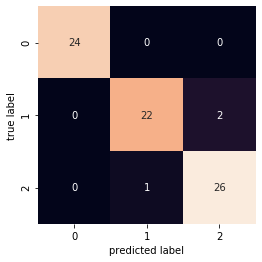

In [27]:
#使用热力图画混淆矩阵
ax = sns.heatmap(mat,square=True,annot=True,cbar=False)#square=True指定方形，annot=True
ax.set(ylim=[3,0],xlabel='predicted label',ylabel='true label')